In [ ]:
import random
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Написать программу, которая используя преобразование Хафа, находит все белые прямые линии (и только их) на картинке lines.jpg (у преподавателя). Можно проводить предобработку изображения: размытие, фильтрации, выделение границ. Найденные линии выделить (нарисовать) на картинке зеленым цветом, попробовать с толщиной линии 1px, 2px.

In [ ]:
!curl https://i.imgur.com/2b9xjeP.jpeg > /content/lines.jpeg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 75192  100 75192    0     0   365k      0 --:--:-- --:--:-- --:--:--  367k


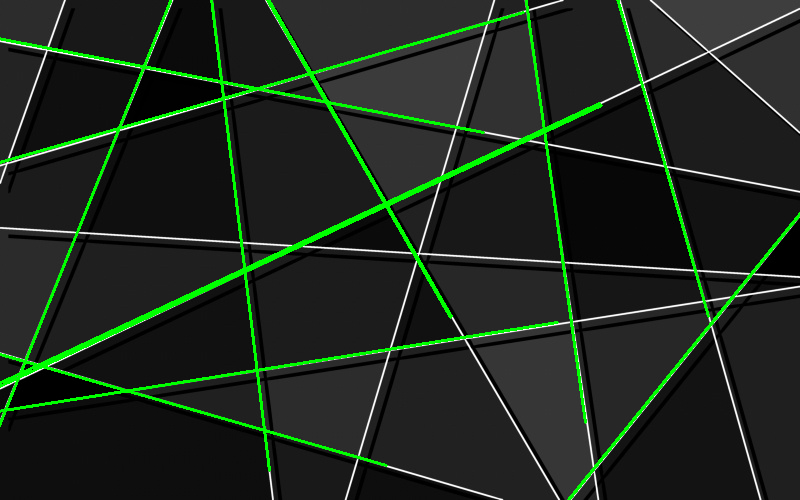

In [ ]:
lines = cv2.imread('/content/lines.jpeg', 0)
color_lines = cv2.imread('/content/lines.jpeg')
_, thresh = cv2.threshold(lines, 200, 255, cv2.THRESH_BINARY)
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.ones((5, 5), np.uint8))
# morph = cv2.dilate(thresh, np.ones((5, 5), np.uint8))

hough_lines = cv2.HoughLines(morph, 1, np.pi/180, 200)
# Отрисовка прямых:
multiplier = 500
for line in hough_lines:
  rho, theta = line[0]
  k1, k2 = np.cos(theta), np.sin(theta)
  x0, y0 = k1*rho, k2*rho
  x1, y1 = int(x0 + multiplier*(-k2)), int(y0 + multiplier*k1)
  x2, y2 = int(x0 - multiplier*(-k2)), int(y0 - multiplier*k1)
  cv2.line(color_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)
cv2_imshow(color_lines)

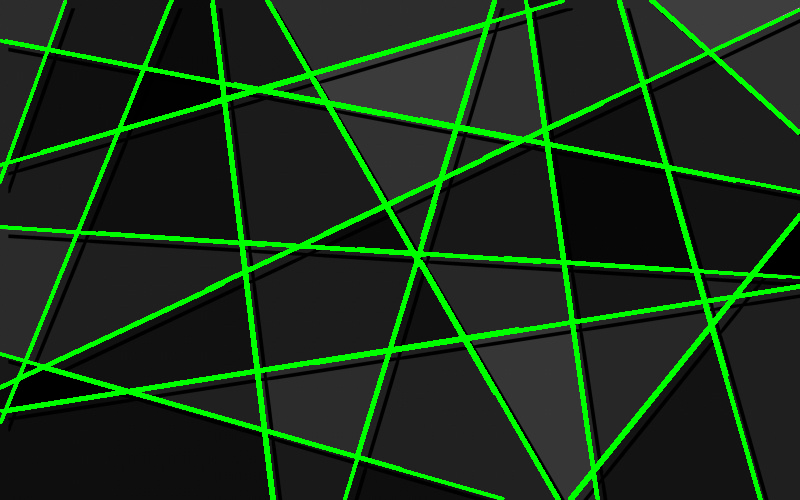

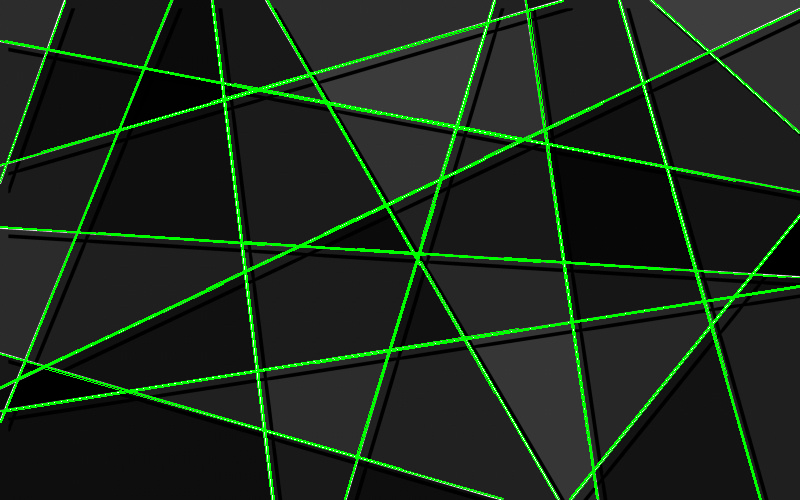

In [ ]:
lines = cv2.imread('/content/lines.jpeg', 0)
color_lines = cv2.imread('/content/lines.jpeg')
_, thresh = cv2.threshold(lines, 200, 255, cv2.THRESH_BINARY)
dilate = cv2.dilate(thresh, np.ones((3, 3), np.uint8))
# cv2_imshow(dilate)
hough_lines = cv2.HoughLinesP(dilate, 1, np.pi/180, 170, None, 100, 10)
# Отрисовка прямых:
for line in hough_lines:
  for x1, y1, x2, y2 in line:
    cv2.line(color_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)
cv2_imshow(color_lines)

color_lines = cv2.imread('/content/lines.jpeg')
for line in hough_lines:
  for x1, y1, x2, y2 in line:
    cv2.line(color_lines, (x1, y1), (x2, y2), (0, 255, 0), 1)
cv2_imshow(color_lines)

Написать программу, которая используя преобразование Хафа, находит на skyskeb_one.jpg (у преподавателя) только те линии, которые соответствуют вертикальным границам самого высокого здания. Можно проводить предобработку изображения: размытие, фильтрации, выделение границ. На всю ширину рисунка отобразить прямые, проходящие через эти линии, зеленым цветом.

In [ ]:
!curl https://i.imgur.com/bs17O4m.jpeg > /content/skyskeb_one.jpeg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  200k  100  200k    0     0   975k      0 --:--:-- --:--:-- --:--:--  974k


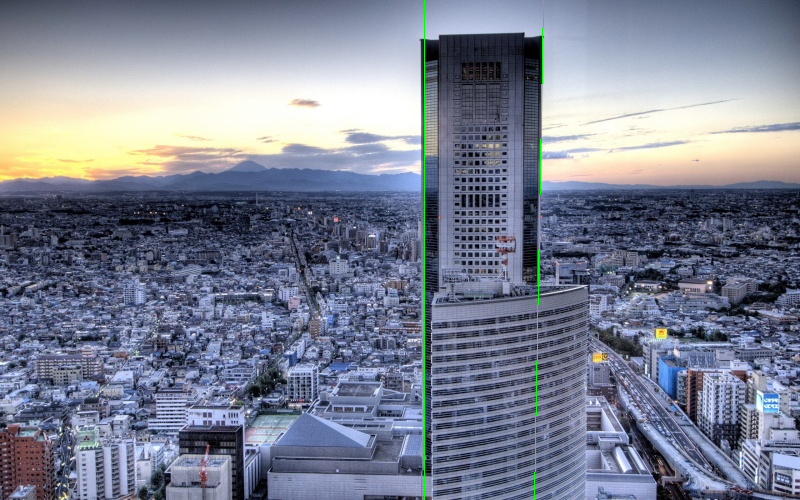

In [ ]:
skyskeb_one = cv2.imread('/content/skyskeb_one.jpeg', 0)
color_skyskeb_one = cv2.imread('/content/skyskeb_one.jpeg')
blurred = cv2.GaussianBlur(skyskeb_one, (17, 17), 0)
edges = cv2.Canny(blurred, 60, 160)
hough_lines = cv2.HoughLines(edges, 1, np.pi/180, 125)

multiplier = 500
for line in hough_lines:
  rho, theta = line[0]
  k1, k2 = np.cos(theta), np.sin(theta)
  x0, y0 = k1*rho, k2*rho
  x1, y1 = int(x0 + multiplier*(-k2)), int(y0 + multiplier*k1)
  x2, y2 = int(x0 - multiplier*(-k2)), int(y0 - multiplier*k1)
  cv2.line(color_skyskeb_one, (x1, y1), (x2, y2), (0, 255, 0), 1)
cv2_imshow(color_skyskeb_one)

Находя совпадения по шаблону, выделить в черную рамку все зеленые квадраты на картинке square_many2.jpg и вывести их количество.

In [ ]:
!curl https://i.imgur.com/WFkvsOX.jpeg > /content/square_many.jpeg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  125k  100  125k    0     0   338k      0 --:--:-- --:--:-- --:--:--  338k


In [ ]:
square_many = cv2.imread('/content/square_many.jpeg')
squares_gray = cv2.cvtColor(square_many, cv2.COLOR_BGR2GRAY)

In [ ]:
green_color = (0, 255, 0)
template = np.full((30, 30, 3), green_color, np.uint8)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

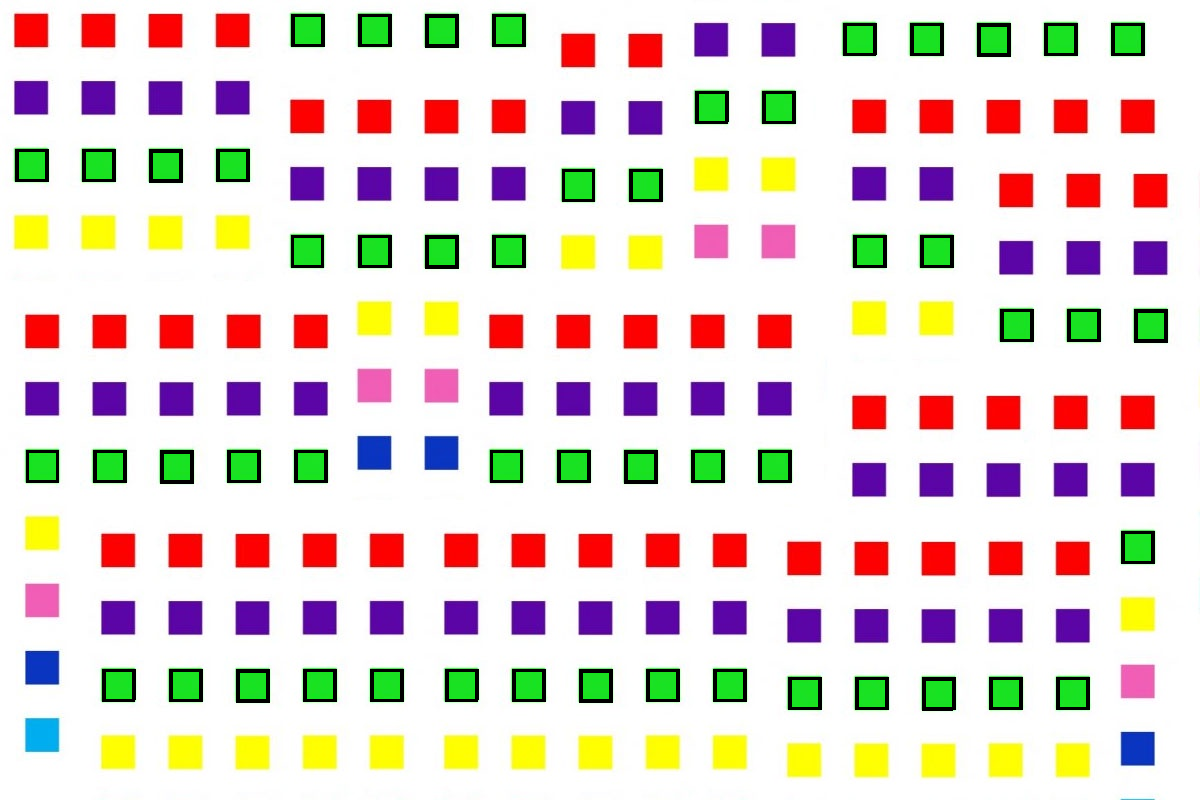

In [ ]:
green_rect_count = 0
res = cv2.matchTemplate(squares_gray, template_gray, cv2.TM_SQDIFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

high_thresh = 0.002
low_thresh = 0.001
match_locations = np.where((res <= high_thresh) & (res >= low_thresh))

w, h = template_gray.shape[::-1]
for (x, y) in zip(match_locations[1], match_locations[0]):
  cv2.rectangle(square_many, (x, y), (x+w, y+h), [0,0,0], 1)

cv2_imshow(square_many)